#Question 1

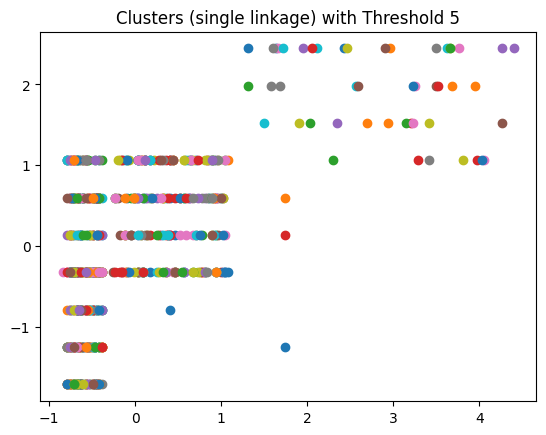

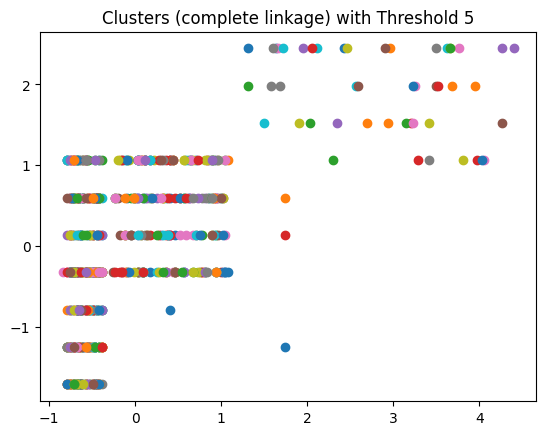

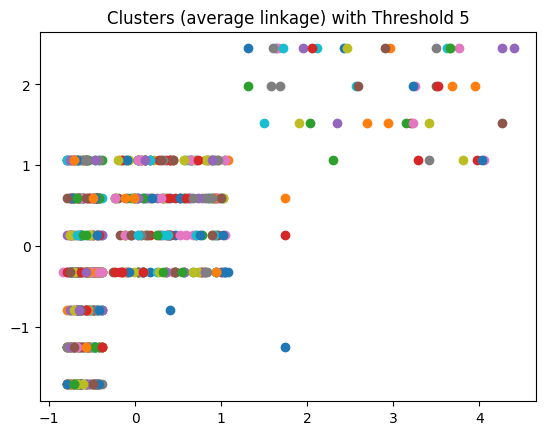

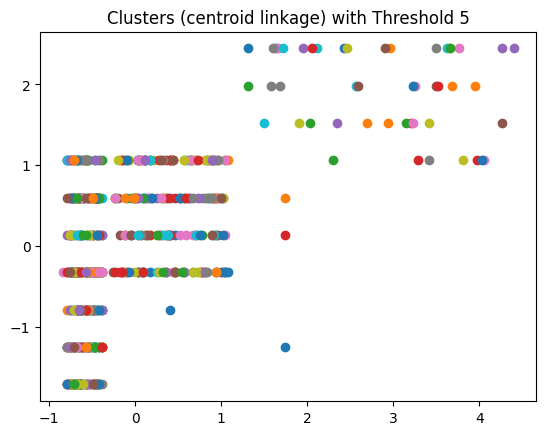

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("CreditCard.csv")

X = data.iloc[:, 2:].values 

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

linkage_methods = ['single', 'complete', 'average', 'centroid']
custom_cluster=[]
def compute_linkage_matrix(X, method):
    n = X.shape[0]
    linkage_matrix = np.zeros((n - 1, 4)) 
    clusters = [[i] for i in range(n)]
    Type=method
    for k in range(n - 1):
        min_distance = np.inf
        cluster_i, cluster_j = 0, 0
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = 0
                for idx_i in clusters[i]:
                    for idx_j in clusters[j]:
                        distance += np.linalg.norm(X[idx_i] - X[idx_j])
                distance /= (len(clusters[i]) * len(clusters[j]))
                if distance < min_distance:
                    min_distance = distance
                    cluster_i, cluster_j = i, j

        new_cluster = clusters[cluster_i] + clusters[cluster_j]
        del clusters[cluster_j]
        clusters[cluster_i] = new_cluster
        
        linkage_matrix[k, 0] = cluster_i
        linkage_matrix[k, 1] = cluster_j
        linkage_matrix[k, 2] = min_distance
        linkage_matrix[k, 3] = len(new_cluster)
    new_cluster=Type
    return linkage_matrix

for method in linkage_methods:
    Z = compute_linkage_matrix(X, method)
    custom_cluster=Z
    threshold = 5 
    clusters = [i for i in range(X.shape[0])]

    for i in range(Z.shape[0]):
        if Z[i, 2] > threshold:
            break
        cluster_i, cluster_j = int(Z[i, 0]), int(Z[i, 1])
        clusters[cluster_i] = cluster_i  
        clusters[cluster_j] = cluster_i 

    unique_clusters = np.unique(clusters)
    for cluster_id in unique_clusters:
        cluster_indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_id]
        cluster_data = X[cluster_indices]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')
    plt.title(f'Clusters ({method} linkage) with Threshold {threshold}')
    plt.show()


In [47]:
custom_cluster=Z

#Question 2

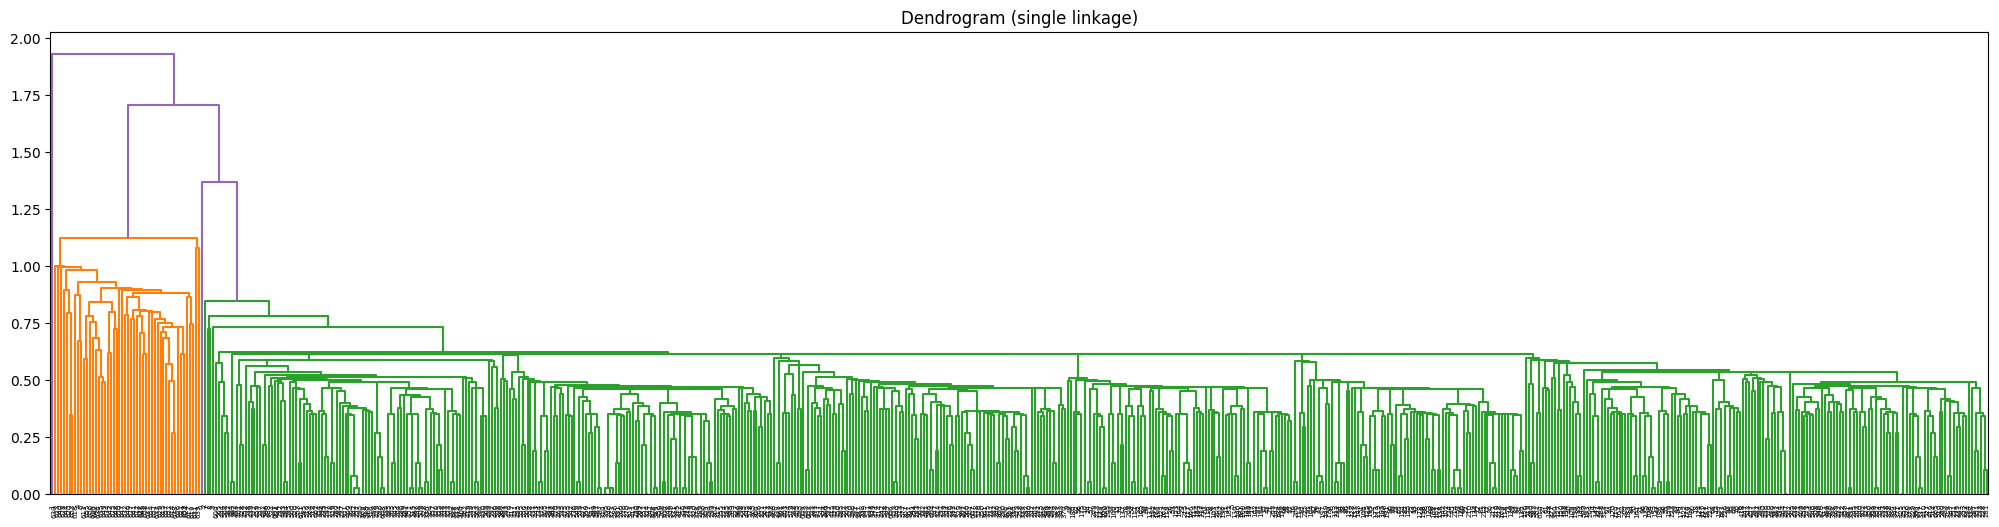

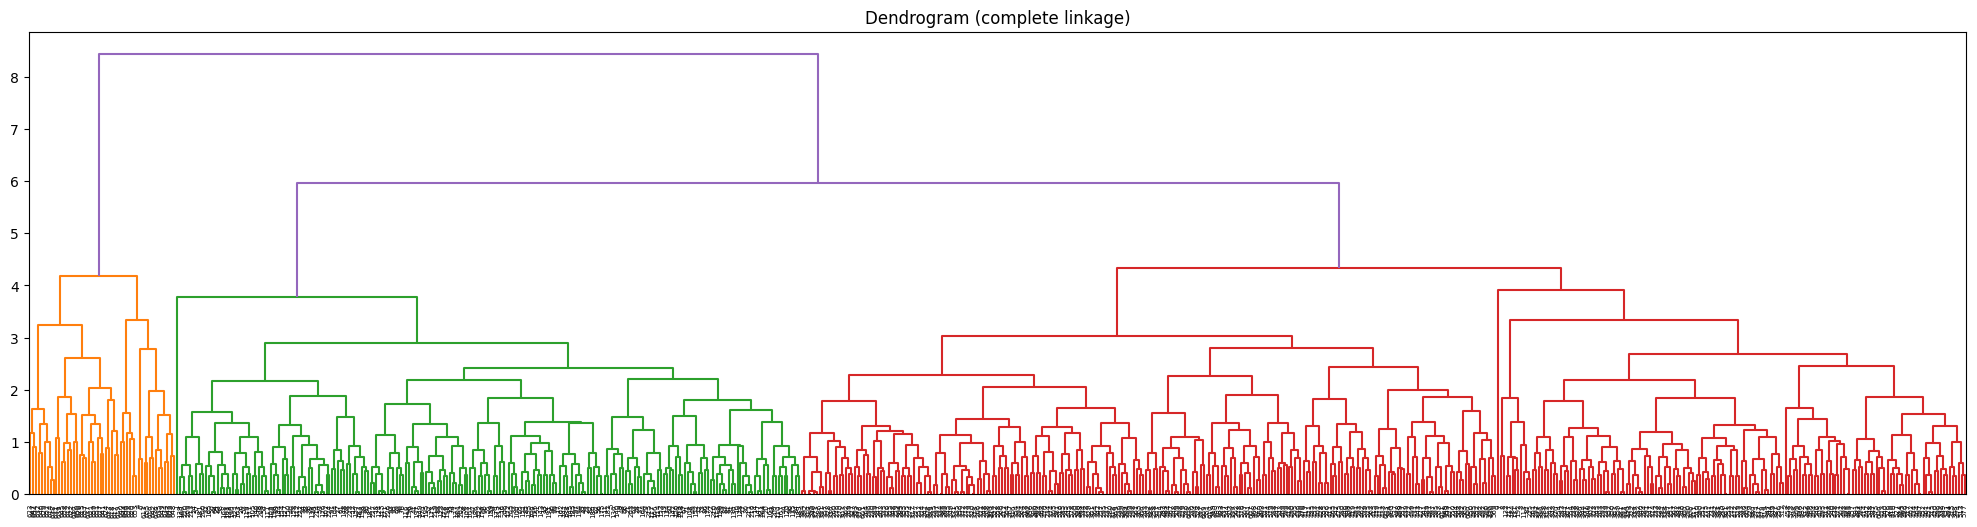

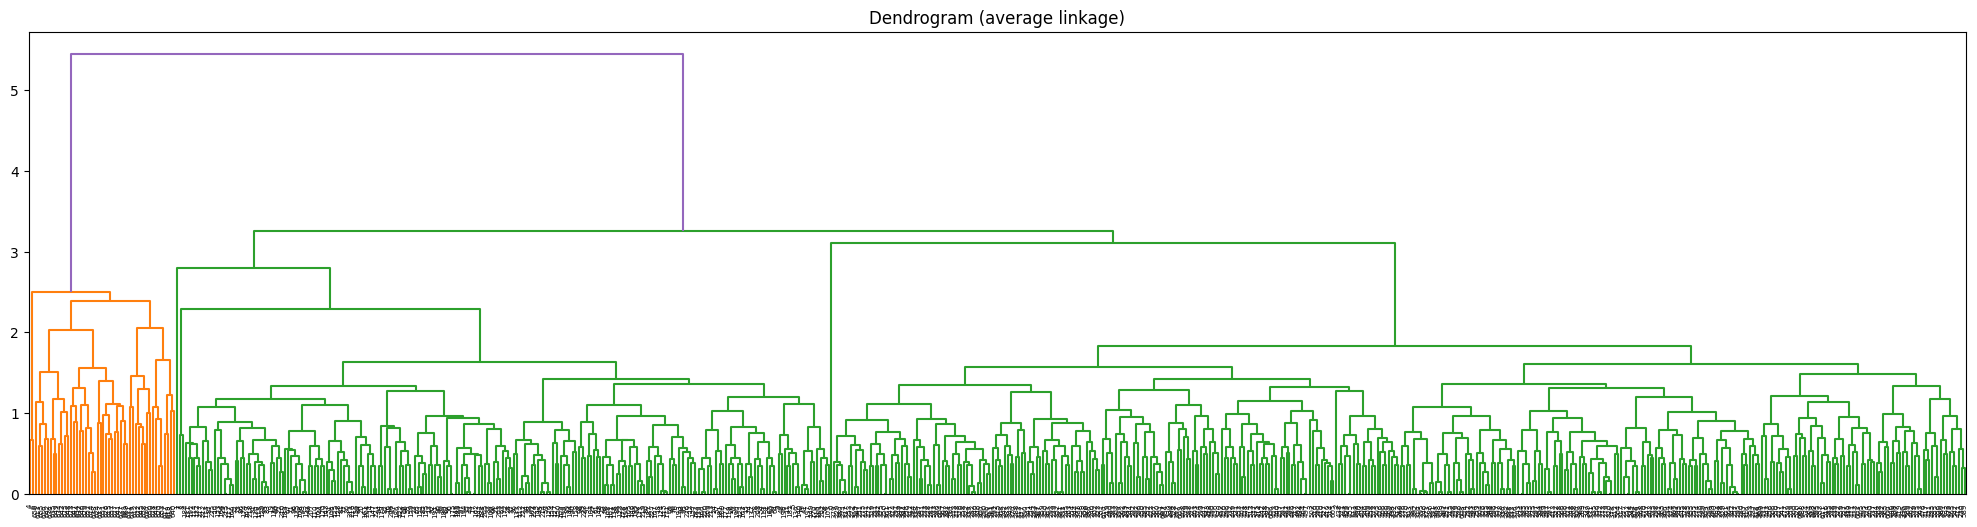

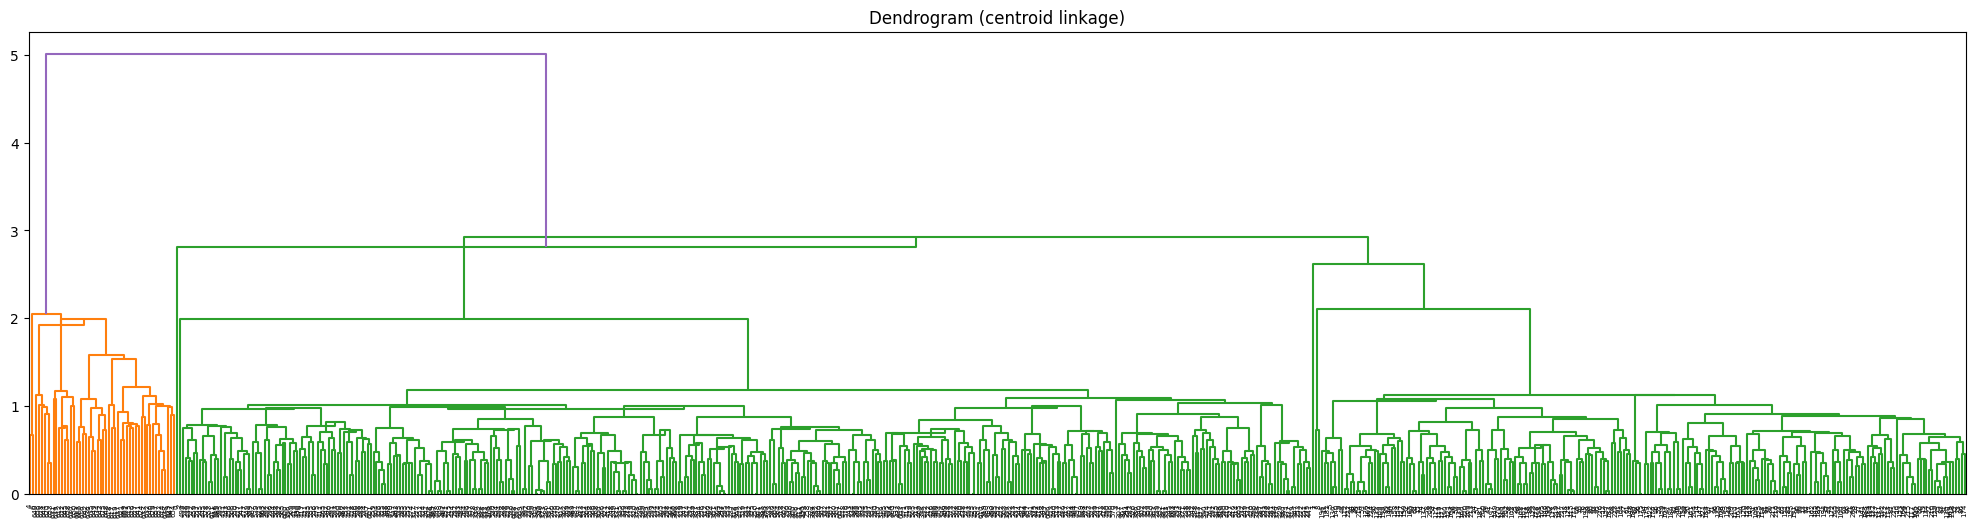

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv("CreditCard.csv")

X = data.iloc[:, 2:].values  

scaler = StandardScaler()
X = scaler.fit_transform(X)

linkage_methods = ['single', 'complete', 'average', 'centroid']


for method in linkage_methods:
    Z = linkage(X, method)  
    plt.figure(figsize=(25, 6))
    plt.title(f'Dendrogram ({method} linkage)')
    dendrogram(Z, above_threshold_color='C4')
    plt.show()

n_clusters = 5

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)


In [48]:
print("Custom Clustering Labels:")
print(custom_cluster)


Custom Clustering Labels:
[[ 257.          295.            0.            2.        ]
 [  17.          162.            0.            2.        ]
 [ 310.          395.            0.            2.        ]
 ...
 [1312.         1315.            2.92121373  609.        ]
 [   0.         1316.            2.80595397  610.        ]
 [1313.         1317.            5.01310254  660.        ]]


In [40]:
print("Scikit-Learn Clustering Labels:")
print(agg_labels)

Scikit-Learn Clustering Labels:
[0 4 0 0 2 3 2 3 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 4 4 4 4 3 3 3 3 4 3 4 3 4
 3 4 4 4 3 3 3 3 4 3 3 3 3 4 3 4 4 4 3 3 4 4 4 3 4 3 3 4 3 4 3 4 4 4 3 3 3
 4 3 4 3 4 3 4 3 3 3 3 3 3 3 4 4 3 4 3 4 3 4 3 3 4 3 3 4 4 4 4 4 3 3 3 4 3
 4 4 3 3 3 4 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 4 3 3 3 4 4 4 3 3 3 3 4 3 4 3
 4 3 4 3 3 3 4 3 3 4 4 3 4 3 3 4 3 4 3 3 4 3 3 3 3 4 3 3 3 4 4 3 3 4 3 4 3
 3 3 3 3 3 4 3 3 4 3 4 4 3 4 4 4 4 4 4 3 3 3 3 4 4 3 3 3 4 4 3 3 3 3 4 4 3
 4 4 4 3 4 3 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 3 1 0 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 3 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1

In [ ]:
""